In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## READ CSV

In [2]:
car = pd.read_csv(r'C:\Users\sudhin\Downloads\dataset\car_mileage_dataset.csv')

In [3]:
car

,Engine_Size,Weight,Horsepower,Age,Tire_Pressure,Mileage
0,1.718856,3303.587688,120.060539,3.0,30.568048,24.120997
1,2.271280,4541.092596,170.577553,3.0,33.246799,NaN
2,2.369233,2682.991705,165.362618,11.0,30.411395,21.363891
3,2.738947,3634.406726,85.742147,14.0,32.595521,11.134110
4,2.180818,2823.982205,128.779954,9.0,31.162590,23.293422
...,...,...,...,...,...,...
201,2.943093,3511.065958,126.304243,10.0,34.709690,18.135011
202,1.137541,2873.892302,163.292560,4.0,32.461888,27.900468
203,1.648973,2764.254097,153.094732,2.0,33.535967,29.061028
204,3.360085,2676.680686,195.750162,12.0,36.907684,NaN


# Data cleaning process start here

## check duplicated datas

In [4]:
car.duplicated().sum()

np.int64(6)

### Here have duplicated so we need to drop the duplicated datas

In [5]:
print(car.duplicated().sum())

6


In [6]:
car = car.drop_duplicates()

In [7]:
print(car.duplicated().sum())

0


### Here 6 duplicate data where deleted

# Check null value

In [8]:
car.isna().sum()

Engine_Size      4
Weight           4
Horsepower       4
Age              4
Tire_Pressure    4
Mileage          4
dtype: int64

### Here drop all null values

In [9]:
car = car.dropna()

In [10]:
car.isna().sum()

Engine_Size      0
Weight           0
Horsepower       0
Age              0
Tire_Pressure    0
Mileage          0
dtype: int64

In [11]:
car

,Engine_Size,Weight,Horsepower,Age,Tire_Pressure,Mileage
0,1.718856,3303.587688,120.060539,3.0,30.568048,24.120997
2,2.369233,2682.991705,165.362618,11.0,30.411395,21.363891
3,2.738947,3634.406726,85.742147,14.0,32.595521,11.134110
4,2.180818,2823.982205,128.779954,9.0,31.162590,23.293422
5,2.130528,3122.919808,142.386453,10.0,30.682203,21.633215
...,...,...,...,...,...,...
199,1.576603,3380.169535,183.213433,11.0,31.733884,17.642260
200,2.769018,2425.655140,57.923153,5.0,31.763204,31.826134
201,2.943093,3511.065958,126.304243,10.0,34.709690,18.135011
202,1.137541,2873.892302,163.292560,4.0,32.461888,27.900468


# Checking for outliers

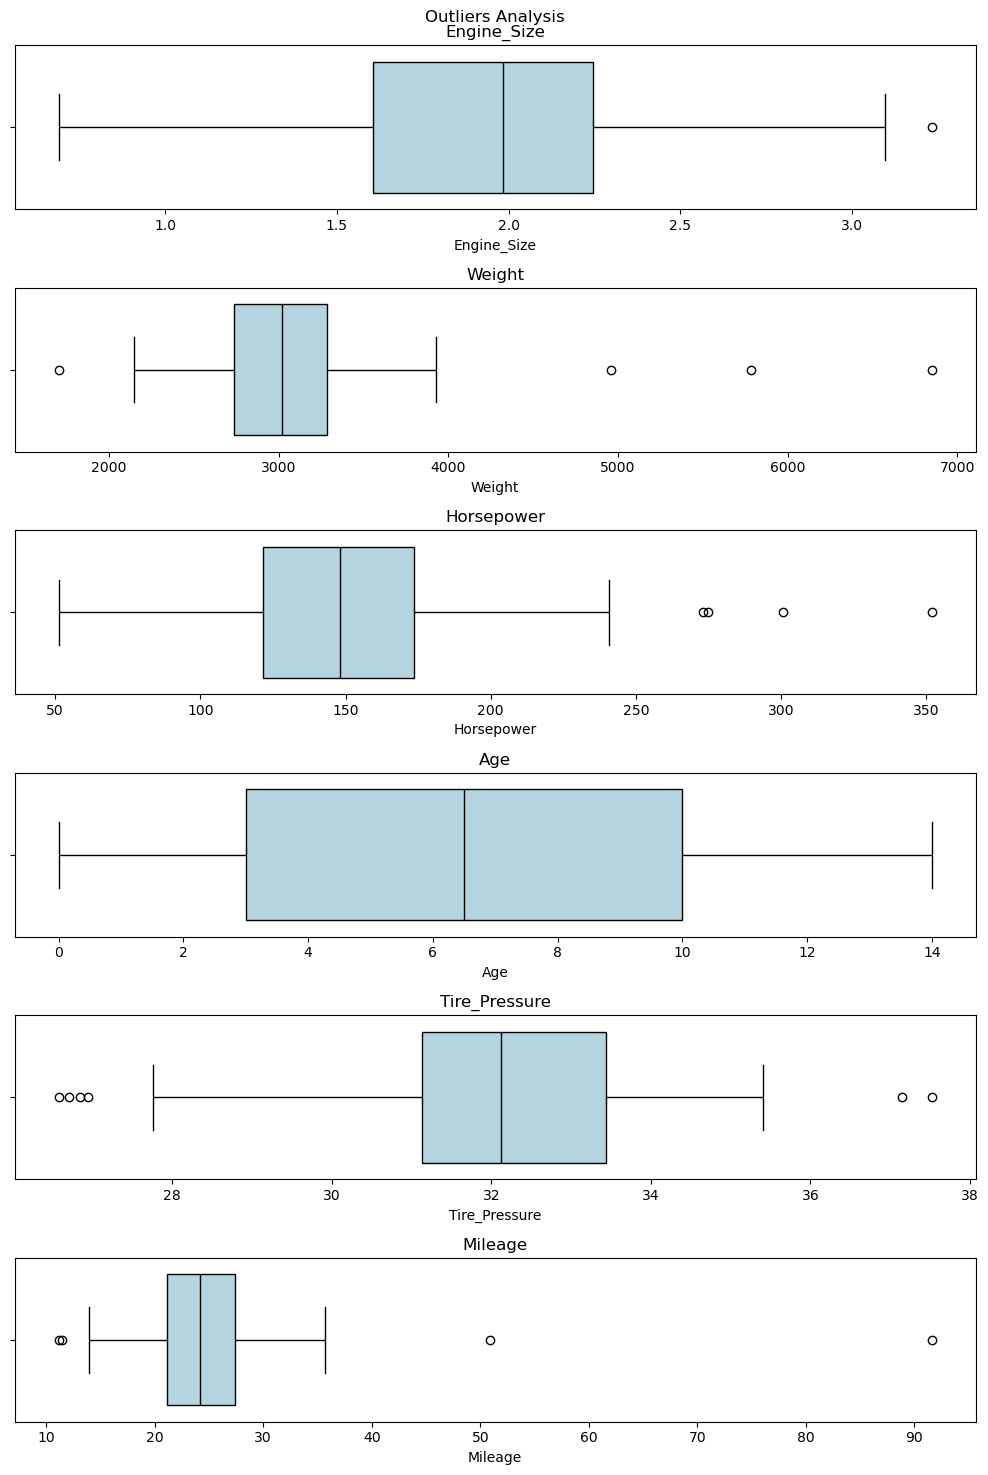

In [12]:
plt.figure(figsize =(10,15))

plt.suptitle("Outliers Analysis")

# fig 1
plt.subplot(6,1,1)
plt.title('Engine_Size')
sns.boxplot(x=car['Engine_Size'] , color ='lightblue' ,linecolor = 'black')

# fig 2
plt.subplot(6,1,2)
plt.title('Weight')
sns.boxplot(x=car['Weight'] ,color ='lightblue' ,linecolor = 'black')

#fig 3
plt.subplot(6,1,3)
plt.title('Horsepower')
sns.boxplot(x=car['Horsepower'] ,color ='lightblue' ,linecolor = 'black')

# fig 4
plt.subplot(6,1,4)
plt.title('Age')
sns.boxplot(x=car['Age'] ,color ='lightblue' ,linecolor = 'black')

# fig 5
plt.subplot(6,1,5)
plt.title('Tire_Pressure')
sns.boxplot(x=car['Tire_Pressure'] ,color ='lightblue' ,linecolor = 'black')

# fig 6
plt.subplot(6,1,6)
plt.title('Mileage')
sns.boxplot(x=car['Mileage'] ,color ='lightblue' ,linecolor = 'black')

plt.tight_layout()

### Here have some outliers

- Has outliers on the right (high end), with several points visible between approximately 5500 and 7000 units. This indicates a few vehicles are considerably heavier than the rest.
- Has outliers on the right (high end), with points visible near 60, 70, and 90 on the x-axis. These represent vehicles with significantly higher mileage than the bulk of the data.
- And another also have but it maybe have engine size greater than 3 and hp greater than 300 and tyre pressure may be increase of dicrease so this type of outliers can have
  

### We need to remove the outliers for better prediction


In [13]:
car =car[car['Mileage']<40]

In [14]:
car =car[car['Weight']>2000]

In [43]:
car = car[car['Weight']<6000]

<Axes: xlabel='Weight'>

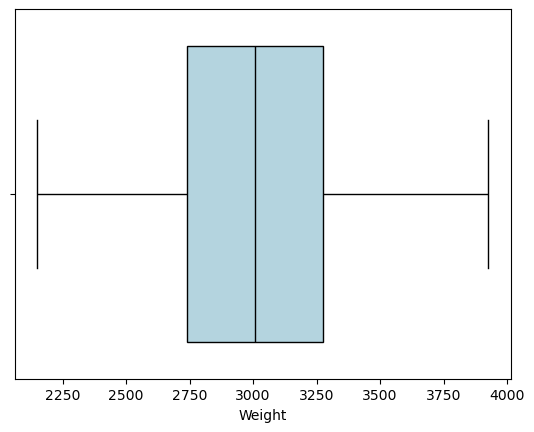

In [44]:
sns.boxplot(x=car['Weight'] ,color ='lightblue' ,linecolor = 'black')

<Axes: xlabel='Mileage'>

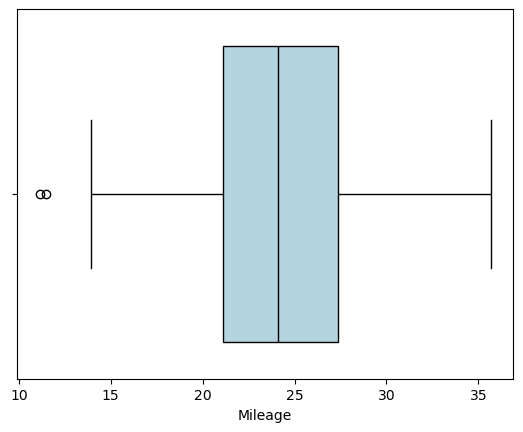

In [16]:
sns.boxplot(x=car['Mileage'] ,color ='lightblue' ,linecolor = 'black')

# EDA

In [45]:
car

,Engine_Size,Weight,Horsepower,Age,Tire_Pressure,Mileage
0,1.718856,3303.587688,120.060539,3.0,30.568048,24.120997
2,2.369233,2682.991705,165.362618,11.0,30.411395,21.363891
3,2.738947,3634.406726,85.742147,14.0,32.595521,11.134110
4,2.180818,2823.982205,128.779954,9.0,31.162590,23.293422
5,2.130528,3122.919808,142.386453,10.0,30.682203,21.633215
...,...,...,...,...,...,...
199,1.576603,3380.169535,183.213433,11.0,31.733884,17.642260
200,2.769018,2425.655140,57.923153,5.0,31.763204,31.826134
201,2.943093,3511.065958,126.304243,10.0,34.709690,18.135011
202,1.137541,2873.892302,163.292560,4.0,32.461888,27.900468


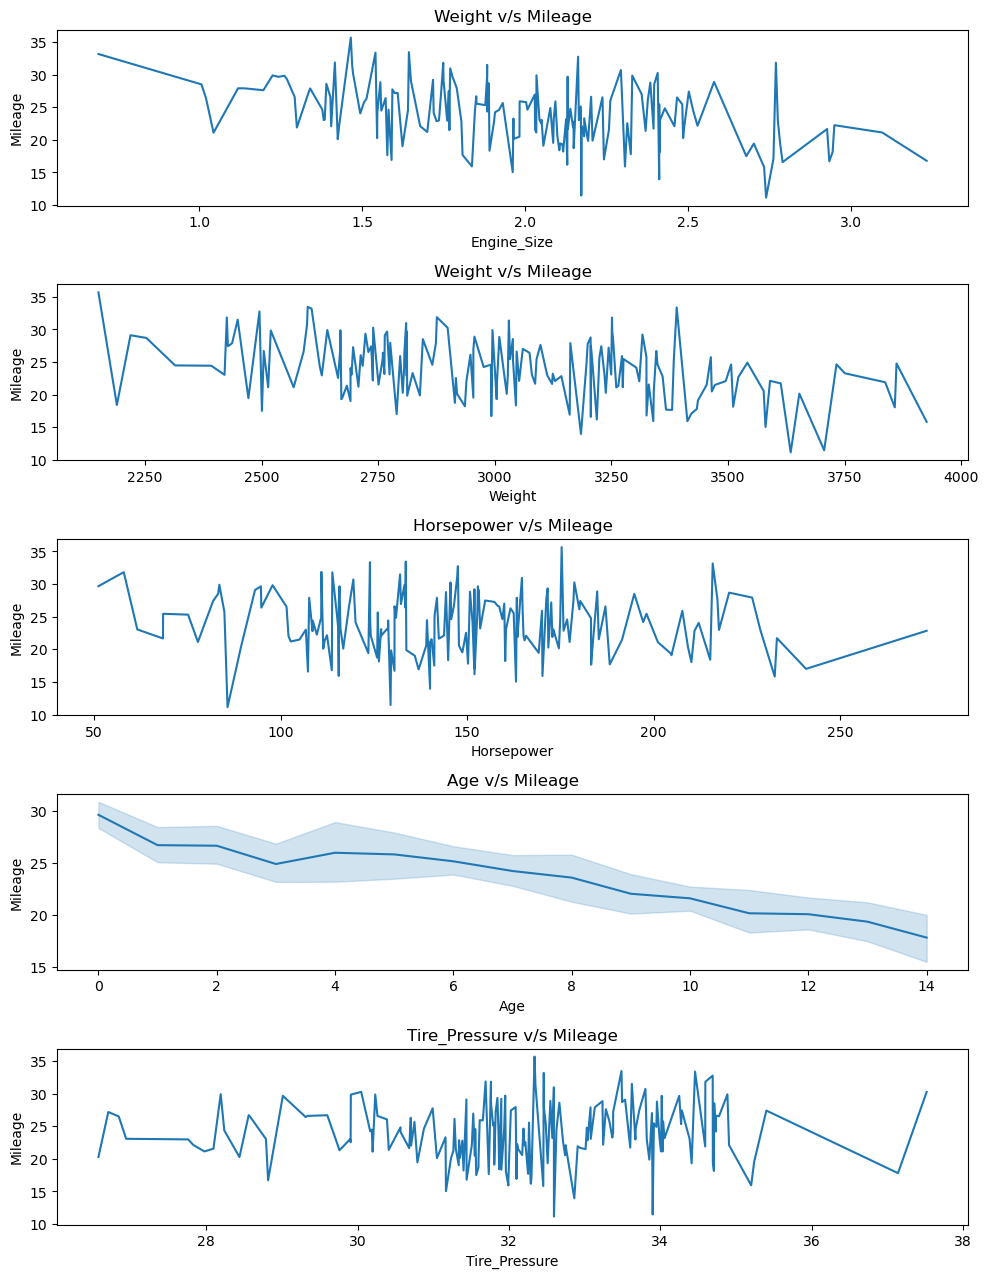

In [46]:
## line plot
# Engine size v/s Mileage
plt.figure(figsize =(10,15))

plt.subplot(6,1,1)
sns.lineplot(car ,x = car['Engine_Size'], y= car['Mileage'] )
plt.title('Weight v/s Mileage')


plt.subplot(6,1,2)
sns.lineplot(car ,x = car['Weight'], y= car['Mileage'] )
plt.title('Weight v/s Mileage')

plt.subplot(6,1,3)
sns.lineplot(car ,x = car['Horsepower'], y= car['Mileage'] )
plt.title('Horsepower v/s Mileage')

plt.subplot(6,1,4)
sns.lineplot(car ,x = car['Age'], y= car['Mileage'] )
plt.title('Age v/s Mileage')

plt.subplot(6,1,5)
sns.lineplot(car ,x = car['Tire_Pressure'], y= car['Mileage'] )
plt.title('Tire_Pressure v/s Mileage')

plt.tight_layout()

# Explanation of each visualization
### 1 .Engine Size vs. Mileage
- As the engine size increases, mileage tends to decrease, meaning cars with larger engines consume more fuel per          mile.
- This trend is consistent with engineering principles — larger engines typically produce more power but are less fuel-efficient.

### 2 .Weight vs. Mileage
- As the vehicle weight increases, the fuel efficiency drops, since more energy is required to move a heavier body.
- The irregular fluctuations may result from mixed data (different vehicle classes — SUVs, sedans, etc.), which can introduce variability.

### 3.Horsepower vs. Mileage
- Vehicles with high horsepower are designed for performance rather than efficiency, leading to greater fuel consumption.
- The scattered, irregular pattern indicates that mileage is not solely determined by horsepower — engine tuning and drivetrain efficiency also play significant roles.

### 4.Age vs. Mileage
- Mileage decreases steadily as vehicle age increases.
- The shaded area represents a confidence interval, confirming that older vehicles consistently show lower fuel efficiency.
- This pattern aligns with real-world expectations — aging engines, worn components, and reduced mechanical efficiency lower overall mileage.

### 5.Tire Pressure vs. Mileage
- The tire pressure vs. mileage plot shows no strong linear relationship, but scattered fluctuations.
- Improper tire pressure (either too low or too high) can reduce mileage, explaining the irregular pattern.
- Maintaining optimal tire pressure is essential for consistent fuel efficiency, though the effect is smaller compared to factors like engine size or age

# DATA MODELING
1. Split to x and y
2.  Then use Train_test_split method to split the 80% of data to train and 20% data to test
3.  Then build model for prediction

In [72]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

## 1 Split to x and y

In [73]:
y = car['Mileage']
x = car[['Engine_Size','Weight','Age','Horsepower','Tire_Pressure']]

In [74]:
x

,Engine_Size,Weight,Age,Horsepower,Tire_Pressure
0,1.718856,3303.587688,3.0,120.060539,30.568048
2,2.369233,2682.991705,11.0,165.362618,30.411395
3,2.738947,3634.406726,14.0,85.742147,32.595521
4,2.180818,2823.982205,9.0,128.779954,31.162590
5,2.130528,3122.919808,10.0,142.386453,30.682203
...,...,...,...,...,...
199,1.576603,3380.169535,11.0,183.213433,31.733884
200,2.769018,2425.655140,5.0,57.923153,31.763204
201,2.943093,3511.065958,10.0,126.304243,34.709690
202,1.137541,2873.892302,4.0,163.292560,32.461888


In [51]:
y

0      24.120997
2      21.363891
3      11.134110
4      23.293422
5      21.633215
         ...    
199    17.642260
200    31.826134
201    18.135011
202    27.900468
203    29.061028
Name: Mileage, Length: 172, dtype: float64

## 2 use Train_test_split method to split the 80% of data to train and 20% data to test
- The main goal of a train-test split is to evaluate how well a machine learning model generalizes to new, unseen data.
When building models, you don’t just want them to perform well on the data they were trained on  you want them to make accurate predictions on future (unseen) data.
That’s where the train-test split comes in.

In [52]:
X_train ,X_test,Y_train,Y_test = train_test_split(x,y,test_size =0.2,random_state=42,)

In [53]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((137, 5), (35, 5), (137,), (35,))

##  3 model for prediction

In [54]:
model = LinearRegression()
model

LinearRegression()

In [55]:
model.fit(X_train,Y_train)

LinearRegression()

In [56]:
model.intercept_

np.float64(47.33366879092436)

In [57]:
model.coef_

array([-3.51842713, -0.00529511, -0.74534948, -0.01651749,  0.21107735])

In [58]:
print('intercept (B0)',model.intercept_)
print('Slop (B1)',model.coef_)

intercept (B0) 47.33366879092436
Slop (B1) [-3.51842713 -0.00529511 -0.74534948 -0.01651749  0.21107735]


In [59]:
Y_pred = model.predict(X_test)
Y_pred

array([21.81394762, 26.54671328, 23.0598785 , 20.10922798, 25.64032124,
       18.57928556, 30.29774472, 27.78631454, 25.04314495, 32.65465525,
       21.68103963, 16.15143257, 26.07143247, 22.97034028, 23.54500219,
       24.4036958 , 30.76190495, 21.81987301, 28.27825714, 31.39875331,
       18.52544969, 26.90290583, 20.38854748, 23.87885667, 26.76796429,
       29.89414398, 19.23767884, 22.27921273, 24.61843357, 24.46688104,
       15.669277  , 28.62682237, 21.83384551, 25.15158442, 22.41434272])

In [60]:
predicted = pd.DataFrame({"Actual":Y_test,'Predicted':Y_pred})
predicted

,Actual,Predicted
90,22.536472,21.813948
165,26.410277,26.546713
181,26.937626,23.059879
71,22.781140,20.109228
186,25.652843,25.640321
196,20.268168,18.579286
99,30.264407,30.297745
169,26.571065,27.786315
137,22.820225,25.043145
33,33.448394,32.654655


## Predict for new

In [61]:
new = pd.DataFrame({'Engine_Size':[1.5],
                    'Weight':[3000],
                    'Age' :[10],
                    'Horsepower':[130],
                    'Tire_Pressure':[28]})

In [62]:
model.predict(new)
print('predicted Mileage : ',model.predict(new)[0])

predicted Mileage :  22.48008931685547


# Method to improve accuracy of model
## Standardization Works (The Math)
- for each data point ($x$) in a feature column, the standardized value ($z$) is calculated using the following formula:
 ## $$z = \frac{x - \mu}{\sigma}$$
- $x$ is the original feature value.
- $\mu$ is the mean of the feature column.
- $\sigma$ is the standard deviation of the feature column.

In [63]:
car

,Engine_Size,Weight,Horsepower,Age,Tire_Pressure,Mileage
0,1.718856,3303.587688,120.060539,3.0,30.568048,24.120997
2,2.369233,2682.991705,165.362618,11.0,30.411395,21.363891
3,2.738947,3634.406726,85.742147,14.0,32.595521,11.134110
4,2.180818,2823.982205,128.779954,9.0,31.162590,23.293422
5,2.130528,3122.919808,142.386453,10.0,30.682203,21.633215
...,...,...,...,...,...,...
199,1.576603,3380.169535,183.213433,11.0,31.733884,17.642260
200,2.769018,2425.655140,57.923153,5.0,31.763204,31.826134
201,2.943093,3511.065958,126.304243,10.0,34.709690,18.135011
202,1.137541,2873.892302,163.292560,4.0,32.461888,27.900468


### Import the standardization library (tandardScaler) from sklearn

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
X_train_scaled.size

685

In [67]:
model = LinearRegression()
model.fit(X_train_scaled , Y_train)

LinearRegression()

In [68]:
Y_pred = model.predict(X_test_scaled)

In [69]:
Y_pred

array([21.81394762, 26.54671328, 23.0598785 , 20.10922798, 25.64032124,
       18.57928556, 30.29774472, 27.78631454, 25.04314495, 32.65465525,
       21.68103963, 16.15143257, 26.07143247, 22.97034028, 23.54500219,
       24.4036958 , 30.76190495, 21.81987301, 28.27825714, 31.39875331,
       18.52544969, 26.90290583, 20.38854748, 23.87885667, 26.76796429,
       29.89414398, 19.23767884, 22.27921273, 24.61843357, 24.46688104,
       15.669277  , 28.62682237, 21.83384551, 25.15158442, 22.41434272])

## Accuracy checking

In [70]:
from sklearn.metrics import mean_absolute_percentage_error

In [71]:
mean_absolute_percentage_error(Y_test , Y_pred)*100

6.6774809719829